In [2]:
!pip install numpy pandas-profiling matplotlib seaborn --quiet


In [3]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import os 
import opendatasets as od 
import pandas as pd 

In [5]:
pd.set_option("display.max_columns",120)
pd.set_option("display.max_rows",120)

In [6]:
from google.colab import files 

In [10]:
uploaded = files.upload()

Saving train.csv (3).zip to train.csv (3).zip
Saving test.csv.zip to test.csv.zip
Saving store.csv to store.csv


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
ross_df = pd.read_csv('./train.csv (3).zip', low_memory=False)
store_df = pd.read_csv('./store.csv')
test_df = pd.read_csv('./test.csv.zip')
 

In [13]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [14]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [15]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

FEATURE ENGINEERING

There are total of seventeen columns and some of which have null values such as CompetitionDistance CompetitionOpenSinceMonth etc 
most of the columns are numeric columns and some of them are categorical columns such as Date which needs to be changed to something meaningful and useful for predictions


In [17]:
#function to split date to a datetime column
def split_date(df):
  df['Date']=pd.to_datetime(df['Date'])
  #splitting it into 3 new columns each for date month and year
  df['Year']=df.Date.dt.year
  df['Month']=df.Date.dt.month
  df['day']=df.Date.dt.day
  df['WeekOfYear']=df.Date.dt.isocalendar().week

In [18]:
split_date(merged_df)
split_date(merged_test_df)

In [19]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


sales are zero if the shop is closed so no need to run prediction algorithm when the store is closed so lets drop all those rows when the store is closed

In [20]:
merged_df=merged_df[merged_df.Open==1].copy()

making columns meningful to make better predictions and vuild better relationships

In [21]:
def comp_months(df):
  df['CompetitionOpen']=12*(df.Year-df.CompetitionOpenSinceYear)+(df.Month-df.CompetitionOpenSinceMonth)
  df['CompetitionOpen']=df['CompetitionOpen'].map(lambda x: 0 if x<0 else x).fillna(0)

the column CompetitionOpen depicts number of mionths since the compition is opne 0 if none exists

In [22]:
comp_months(merged_df)
comp_months(merged_test_df)

In [23]:
#calculate number of months a promo was running
merged_df['Promo2Open'] = 12 * (merged_df.Year - merged_df.Promo2SinceYear) +  (merged_df.WeekOfYear - merged_df.Promo2SinceWeek)*7/30.5
merged_df['Promo2Open'] = merged_df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * merged_df['Promo2']
    

In [24]:
#calculate number of months a promo was running
merged_test_df['Promo2Open'] = 12 * (merged_test_df.Year - merged_test_df.Promo2SinceYear) +  (merged_test_df.WeekOfYear - merged_test_df.Promo2SinceWeek)*7/30.5
merged_test_df['Promo2Open'] = merged_test_df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * merged_test_df['Promo2']
    


In [25]:
months_promo1=merged_df.loc[:,'PromoInterval'][1]
months_promo1


'Jan,Apr,Jul,Oct'

In [26]:
i = merged_df.loc[:,'PromoInterval'][1] 
j = merged_df.loc[:,'Promo2Open'][1]
k = merged_df.loc[:,'Month'][1]
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
months = (i or '').split(',')
try:
    if j and month2str[k] in months:
        print(1)
    else:
        print(0)
except Exception:
    print(0)

1


In [27]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,day,WeekOfYear,CompetitionOpen,Promo2Open
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000


In [28]:
#checking random values of the columns related to promo 2
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open']].sample(5)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open
819619,2013-06-27,0,NaN,NaN,NaN,0.000000
523027,2014-03-20,0,NaN,NaN,NaN,0.000000
58352,2015-06-09,1,2012.0,22.0,"Jan,Apr,Jul,Oct",36.459016
286966,2014-11-07,0,NaN,NaN,NaN,0.000000
757196,2013-08-22,1,2013.0,5.0,"Feb,May,Aug,Nov",6.655738


In [29]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open'],
      dtype='object')

In [30]:
#defining inputs and targets
input_cols=['Store', 'DayOfWeek','Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open','Assortment']
       #dropping un nessesary columns and targets
target_cols='Sales'

In [31]:
 inputs = merged_df[input_cols].copy()
 targets=merged_df[target_cols].copy()
 test_inputs=merged_test_df[input_cols].copy()

In [32]:
numeric_cols=['Store','Promo','SchoolHoliday','CompetitionDistance',
              'CompetitionOpen','Promo2','day','Month','Year','WeekOfYear','Promo2Open']
categorical_cols=['DayOfWeek','StateHoliday','StoreType','Assortment']

In [33]:
#checking if we have any missing data in numeric columns
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
day                       0
Month                     0
Year                      0
WeekOfYear                0
Promo2Open                0
dtype: int64

In [34]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
day                     0
Month                   0
Year                    0
WeekOfYear              0
Promo2Open              0
dtype: int64

'CompetitionDistance' is the only column where the data is missing that means there is no competition and we can fill a large value which imples the same 

In [35]:
max_dist=inputs.CompetitionDistance.max()

In [36]:
max_dist

75860.0

In [37]:
#filling the missing data with 2*max_dist in inputs 
inputs['CompetitionDistance'].fillna(2*max_dist,inplace=True)
test_inputs['CompetitionDistance'].fillna(2*max_dist,inplace=True)

In [38]:
#scaling the values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [39]:
#converting categorical columns to numeric using one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False ,handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out())
 
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
# extracting  out all the numeric data for training.
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]


In [40]:
X

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,day,Month,Year,WeekOfYear,Promo2Open,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,1.0,1.0,0.008240,0.059163,0.0,1.0,0.545455,1.0,0.588235,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,1.0,1.0,0.003626,0.066378,1.0,1.0,0.545455,1.0,0.588235,0.890710,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,1.0,1.0,0.093013,0.074315,1.0,1.0,0.545455,1.0,0.588235,0.720856,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,1.0,1.0,0.003955,0.050505,0.0,1.0,0.545455,1.0,0.588235,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,1.0,1.0,0.197034,0.002165,0.0,1.0,0.545455,1.0,0.588235,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,0.0,1.0,0.000857,0.054834,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016827,0.657092,0.0,1.0,0.005537,0.114719,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016863,0.689408,0.0,1.0,0.005405,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.016849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017042,0.850090,0.0,1.0,0.009295,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [41]:
#gradient boosting technique
# successively training fixed number of des trees to correct the preds
from xgboost import XGBRegressor
model=XGBRegressor(random_state=12,n_jobs=-1,n_estimators=20,max_depth=4)
model.fit(X,targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=12, ...)

In [42]:
preds=model.predict(X)
preds

array([ 8323.803 ,  7716.3823,  8634.8955, ...,  6486.2915,  9425.37  ,
       10267.446 ], dtype=float32)

In [43]:
from sklearn.metrics import mean_squared_error

def rmse(a,b):
  return mean_squared_error(a,b,squared=False)


In [44]:
rmse(preds,targets)

2379.4740891775054

In [45]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

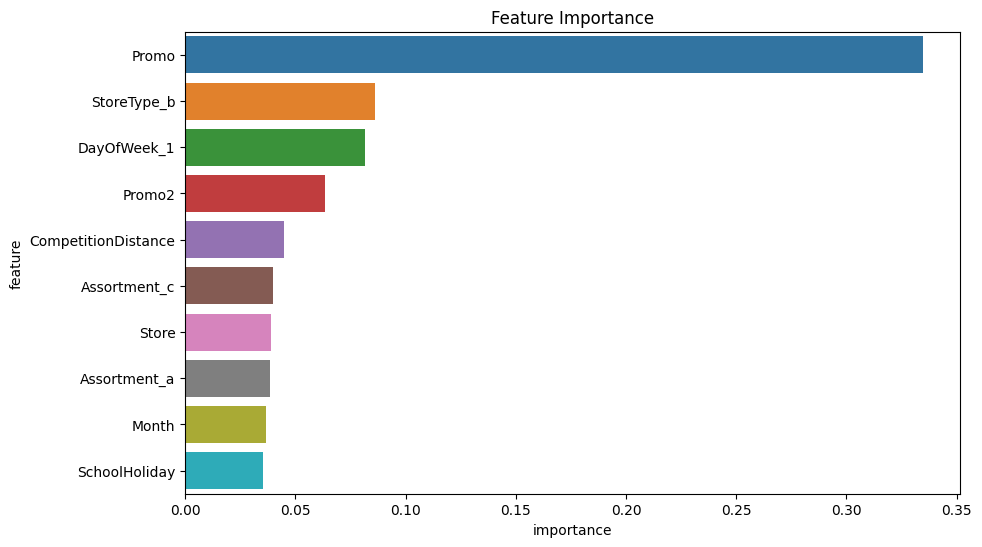

In [46]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [49]:
#Kfold cross validation 
from sklearn.model_selection import KFold
def train_and_eval(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse
 


In [50]:
 kfold=KFold(n_splits=5)

In [52]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_eval(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


Train RMSE: 2352.25307174321, Validation RMSE: 2425.4855474004116
Train RMSE: 2397.5789200653003, Validation RMSE: 2437.723084188364
Train RMSE: 2365.7321851723577, Validation RMSE: 2337.3675610940063
Train RMSE: 2366.5475914166336, Validation RMSE: 2461.3683190105603
Train RMSE: 2373.089763100142, Validation RMSE: 2430.3202032856343


In [53]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

preds = predict_avg(models, X)
preds

array([8050.0166, 7608.3643, 8749.434 , ..., 7297.542 , 7764.585 ,
       9332.377 ], dtype=float32)

HYPER PARAMETER TUNING 


Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [57]:
def test_params(**params):
  model=XGBRegressor(n_jobs=-1,random_state=12,**params)
  model.fit(X_train,train_targets)
  train_rmse=rmse(model.predict(X_train),train_targets)
  val_rmse=rmse(model.predict(X_val),val_targets)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

tuning n_estimators

In [61]:
test_params(n_estimators=10)

Train RMSE: 2356.643390091824, Validation RMSE: 2369.1937735517304


In [58]:
test_params(n_estimators=50)

Train RMSE: 1591.2197081127579, Validation RMSE: 1595.789751514721


In [59]:
test_params(n_estimators=100)


Train RMSE: 1202.01099367622, Validation RMSE: 1202.5230480564219


here the rum time cost per the rmse decrease is tending to be undesirable 
so we can stop around 100 as the optimal choice for n_params as we dont want ot overfit the
model with the training data or even validation data

tuning max_depth 

In [63]:
test_params(max_depth=2,n_estimators=20)

Train RMSE: 2586.342836933493, Validation RMSE: 2602.9395843709403


In [64]:
test_params(max_depth=5,n_estimators=20)

Train RMSE: 2243.25441604446, Validation RMSE: 2256.0802768398394


In [65]:
test_params(max_depth=10,n_estimators=20)

Train RMSE: 1421.9122234282415, Validation RMSE: 1446.5190123742998


In [66]:
test_params(max_depth=20,n_estimators=20)

Train RMSE: 479.26903835685124, Validation RMSE: 941.7324148308879


max_depth 10 is optimal choice overfitting for the trian data set at max_depth 20

TUNING Learning rate

In [70]:
test_params(n_estimators=10,learning_rate=0.1)

Train RMSE: 3563.793152811724, Validation RMSE: 3582.9471523814955


In [69]:
test_params(n_estimators=10,learning_rate=0.5)

Train RMSE: 2240.824255308361, Validation RMSE: 2260.7697993457687


In [71]:
test_params(n_estimators=10,learning_rate=0.9)

Train RMSE: 1952.5854554744346, Validation RMSE: 1952.3682621241273


tuning all these together

In [72]:
test_params(n_estimators=50,learning_rate=0.5,max_depth=5)

Train RMSE: 1504.0297588167173, Validation RMSE: 1493.9089672763503


In [73]:
test_params(n_estimators=10,learning_rate=0.9,max_depth=5)

Train RMSE: 2232.530606256974, Validation RMSE: 2229.0027209341397


In [74]:
test_params(n_estimators=10,learning_rate=0.5,max_depth=10)

Train RMSE: 1480.9570522805454, Validation RMSE: 1502.5295688932072


n_estimators are the mosnt effective hyperparameter then max_depth then learning rate

In [75]:
test_params(booster='gblinear')

Train RMSE: 2725.9773284649086, Validation RMSE: 2746.5120159746207


In [76]:
test_params()

Train RMSE: 1202.01099367622, Validation RMSE: 1202.5230480564219


In [90]:
model = XGBRegressor(n_jobs=-1, random_state=12, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [91]:
%%time
model.fit(X, targets)

CPU times: user 1h 22s, sys: 7.58 s, total: 1h 29s
Wall time: 36min 54s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=12, ...)

In [79]:
test_preds = model.predict(X_test)


In [81]:
 uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [82]:
submission_df = pd.read_csv('./sample_submission.csv', low_memory=False)

In [83]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [86]:
submission_df['Sales']  = test_preds
#when the store is closed the sales are zero
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [87]:
submission_df

,Id,Sales
0,1,4276.743652
1,2,7745.473145
2,3,8945.933594
3,4,6762.050781
4,5,6464.540039
...,...,...
41083,41084,2315.106689
41084,41085,7436.098633
41085,41086,7077.025391
41086,41087,22970.988281


In [88]:
submission_df.to_csv('submission.csv', index=None)


In [89]:
from IPython.display import FileLink
FileLink('submission.csv')

/content/submission.csv